In [93]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import operator
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as pl
from sklearn.learning_curve import learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score, KFold
import numpy as np

<h1>Challenge 1</h1>

In [94]:
df=pd.read_csv('house-votes-84.csv')

In [95]:
df.replace('y',1, inplace=True)
df.replace('n',0, inplace=True)
cols=list(df.columns)
cols.pop(0)
for i in cols:
    df[i].replace('?',\
        sum(df.replace('?',0)[i])/(len(df)-list(df[i].value_counts())[2]), inplace=True)

In [96]:
df.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,0.000000,1.0,0.0,1.000000,1.00000,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,1.0,0.0,0.72043
1,democrat,0.443128,1.0,1.0,0.416076,1.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.00000
2,democrat,0.000000,1.0,1.0,0.000000,0.50358,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,1.00000
3,democrat,1.000000,1.0,1.0,0.000000,1.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.421836,1.0,1.0,1.0,1.00000
4,democrat,0.000000,1.0,1.0,0.000000,1.00000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.00000


<h1>Challenge 2</h1>

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['republican'], test_size=.3, random_state=4444)

<h1>Challenge 3</h1>

In [103]:
scores=[]
Is=[]
for i in range (1,21):
    model=KNeighborsClassifier(n_jobs=-1, n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    Is.append(i)
    scores.append(accuracy_score(y_pred, y_test))
ind, MAX=max(enumerate(scores),  key=operator.itemgetter(1))
print('highest accuracy of {} at k={}'.format(MAX, ind))

highest accuracy of 0.9312977099236641 at k=11


<h1>Challenge 4</h1>

In [7]:
model=LogisticRegression(n_jobs=-1)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('accuracy of {}'.format(accuracy_score(y_pred, y_test)))

accuracy of 0.9618320610687023


<h1>Challenge 5</h1>

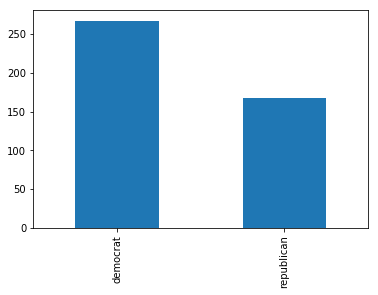

In [12]:
df.republican.value_counts().plot(kind='bar')
plt.show()

In [9]:
df.republican.value_counts()

democrat      267
republican    167
Name: republican, dtype: int64

In [19]:
sums=[]
def party(X):
#     for i in range(len(X)):
#         sums.append(sum(X.iloc[i,:]))
#     grp1=[]
#     grp2=[]
#     for i in range(int(max(sums))+1):
#         print (i)
    return(list('democrat' for i in X.T))
y_pred=party(X_train)

naivedemo=accuracy_score(y_pred, y_train)
naiverepu=1-accuracy_score(y_pred, y_train)

print('If you predict \'democrat\' every time your error will be: {}'.format(naivedemo))
print('If you predict \'republican\' every time your error will be: {}'.format(naiverepu))

If you predict 'democrat' every time your error will be: 0.6204620462046204
If you predict 'republican' every time your error will be: 0.3795379537953796


<h1>Challenge 6</h1>

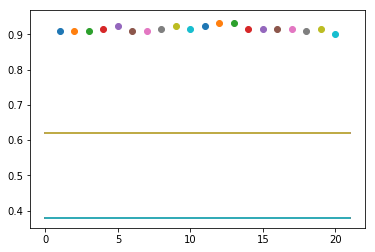

In [35]:
scores=[]
Is=[]
R=21
for i in range (1,R):
    model=KNeighborsClassifier(n_jobs=-1, n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    Is.append(i)
    scores.append(accuracy_score(y_pred, y_test))
    plt.scatter(i, accuracy_score(y_pred, y_test))
    plt.plot([0,R], [naivedemo,naivedemo])
    plt.plot([0,R], [naiverepu,naiverepu])
ind, MAX=max(enumerate(scores),  key=operator.itemgetter(1))
plt.show()

<h1>Challenge 7</h1>

In [56]:
model=KNeighborsClassifier(n_jobs=-1)
k=learning_curve(model, X_train, y_train)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy_score(y_pred, y_test)
k

(array([ 20,  65, 110, 155, 201]),
 array([[ 0.95      ,  1.        ,  1.        ],
        [ 0.92307692,  0.95384615,  0.95384615],
        [ 0.94545455,  0.96363636,  0.96363636],
        [ 0.94193548,  0.95483871,  0.96129032],
        [ 0.95024876,  0.95522388,  0.960199  ]]),
 array([[ 0.95098039,  0.89108911,  0.9       ],
        [ 0.92156863,  0.9009901 ,  0.93      ],
        [ 0.94117647,  0.9009901 ,  0.9       ],
        [ 0.93137255,  0.92079208,  0.91      ],
        [ 0.93137255,  0.93069307,  0.92      ]]))

In [62]:
k[0]

array([ 20,  65, 110, 155, 201])

<h1>Challenge 8</h1>

In [48]:
model=GaussianNB()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Naive Bayes Gaussian error: {}'.format(accuracy_score(y_pred, y_test)))

model=SVC()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Support Vector Machine error: {}'.format(accuracy_score(y_pred, y_test)))

model=DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Decision Tree Classifier error: {}'.format(accuracy_score(y_pred, y_test)))

model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Random Forest Classifier error: {}'.format(accuracy_score(y_pred, y_test)))

Naive Bayes Gaussian error: 0.9083969465648855
Support Vector Machine error: 0.9541984732824428
Decision Tree Classifier error: 0.9236641221374046
Random Forest Classifier error: 0.9541984732824428


<h1>Challenge 9</h1>

In [75]:
kfold = KFold(len(X_train), n_folds=5, shuffle=True, random_state=42)

model=GaussianNB()
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print('Naive Bayes Gaussian error: {}'.format(np.mean(scores)))

model=SVC()
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print('Support Vector Machine error: {}'.format(np.mean(scores)))

model=DecisionTreeClassifier()
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print('Decision Tree Classifier error: {}'.format(np.mean(scores)))

model=RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print('Random Forest Classifier error: {}'.format(np.mean(scores)))

Naive Bayes Gaussian error: 0.9404918032786884
Support Vector Machine error: 0.9505464480874316
Decision Tree Classifier error: 0.9108196721311476
Random Forest Classifier error: 0.9636065573770493


<h1>Challenge 10</h1>

In [165]:
df=pd.read_csv('house-votes-84.csv')
df.replace('y',1, inplace=True)
df.replace('n',0, inplace=True)
cols=list(df.columns)
cols.pop(0)
for i in cols:
    df[i].replace('?',int(df[i].mode()), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df['y.8'], test_size=.3, random_state=4444)

In [169]:
model=KNeighborsClassifier(n_jobs=-1, n_neighbors=11)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('accuracy score: {}'.format(accuracy_score(y_pred, y_test)))

accuracy score: 0.8473282442748091


<h1>Challenge 11</h1>

In [196]:
df=pd.read_csv('2013_movies.csv')

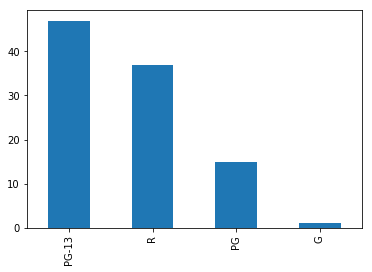

In [197]:
df.Rating.value_counts().plot(kind='bar')
plt.show()

In [198]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [217]:
df.Rating.replace('G',0, inplace=True)
df.Rating.replace('PG',1, inplace=True)
df.Rating.replace('PG-13',2, inplace=True)
df.Rating.replace('R',3, inplace=True)
df.Budget.fillna(df.Budget.mean(),inplace=True )

In [219]:
X_train, X_test, y_train, y_test = train_test_split(df[['DomesticTotalGross','Budget','Runtime']], df['Rating'], test_size=.3, random_state=4444)

In [279]:
model=KNeighborsClassifier(n_jobs=-1, n_neighbors=11)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('KNN score: {}'.format(accuracy_score(y_pred, y_test)))

model=LogisticRegression(n_jobs=-1)
model.fit(X_train, y_train)
print(model.coef_)
y_pred=model.predict(X_test)
print('logistic score: {}'.format(accuracy_score(y_pred, y_test)))

y_pred=list(y_test.mode() for i in y_test)
print('mode score: {}'.format(accuracy_score(y_pred, y_test)))

KNN score: 0.782608695652174
[[ 0.00578524 -0.02123048  0.08002469]]
logistic score: 0.75
mode score: 0.75


<h1>Challenge 12</h1>

In [257]:
df= pd.read_csv('haberman.csv')
print("the average age of patients: {}".format(df['30'].mean()))
print("the stdev age of patients: {}".format(df['30'].std()))
print("the average age of patients: {}".format(df.loc[df['1.1']==1]['30'].mean()))
print("the average age of patients: {}".format(df.loc[df['1.1']==1]['30'].std()))
print("the average age of patients: {}".format(df.loc[df['1.1']==2]['30'].mean()))
print("the average age of patients: {}".format(df.loc[df['1.1']==2]['30'].std()))

the average age of patients: 52.5311475409836
the stdev age of patients: 10.744024363993269
the average age of patients: 52.11607142857143
the average age of patients: 10.93744589077857
the average age of patients: 53.67901234567901
the average age of patients: 10.16713720829741


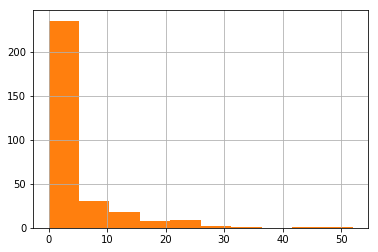

In [259]:
df['1'].hist()
plt.show()

In [263]:
print("earliest year of surgery: 19{}".format(df['64'].min()))
print("earliest year of surgery: 19{}".format(df['64'].max()))

earliest year of surgery: 1958
earliest year of surgery: 1969


In [273]:
X_train, X_test, y_train, y_test = train_test_split(df[['30','64','1']], df['1.1'], test_size=.3, random_state=4444)

model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Model accuracy: {}'.format(accuracy_score(y_pred, y_test)))
model.coef_

Model accuracy: 0.75


array([[ 0.00578524, -0.02123048,  0.08002469]])

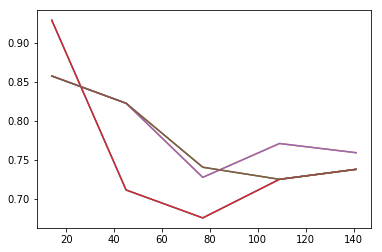

In [277]:
k=learning_curve(model, X_train, y_train)
# plt.scatter()
plt.plot(k[0],k[1])
plt.show()